###  This jupyter file is using for analysis so, all needed methods from BCI interface, No one should write any function existing in BCI interface, if you need new feature write it in BCI interface for relavinte topic then import and use it, this file is using for logic and analysis **ONLY**.

### Import All Needed Class

In [13]:
from BCInterface.Helpers import helper
from BCInterface.Visualization.Visualization import graphs
from BCInterface.Preprocessing.DataPrepare import DataPrepare
from BCInterface.Preprocessing.files_manager import Filesmanager
from mainproccess import Process

import os
import glob
dirc = os.path.abspath("../"+'EEG-SSVEP-DataSet')
dirc

'C:\\Users\\compuland\\Documents\\GitHub\\EEG-SSVEP-DataSet'

### Some users configuations and files, trails, etc...

In [23]:
number_sec = 5           # sellect example time
path_dir_= dirc + '\\5_S\\'
File_regexp= 'U0000a*.csv' # [p|q|r|s|t] [a|b|c|d|e|f|g|h|i|j]

### Get Data from files, and prepare it.

In [24]:
prepare = DataPrepare()
data = prepare.get_dataFromFiles(glob.glob(path_dir_ + File_regexp),concate=True) # data from all files

# Frequency required

In [25]:
frequency = [8.57]  # select freq 


data_coca = prepare.Concate_frequanceis(data, FreqS = frequency) # data with freq
Labels = data_coca['Label'] #.drop('Label',axis=1)
Labels

0      8.57
1      8.57
2      8.57
3      8.57
4      8.57
       ... 
635    8.57
636    8.57
637    8.57
638    8.57
639    8.57
Name: Label, Length: 640, dtype: float64

### Time Domain Visualization, before CAR

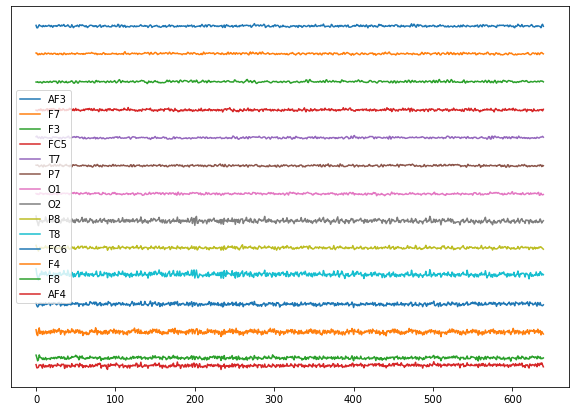

In [26]:
graphs.time_vis(data_coca.copy())

### Calcualte CAR 

In [27]:
data_car = helper.CAR(data_coca.copy())  # CAR on data
# trials_list_after_CAR = prepare.Extraxt_trials(data_car, number_sec)
# freq, power = helper.welch(data_car.copy(),False, True)

### Time Domain Visualization, after CAR

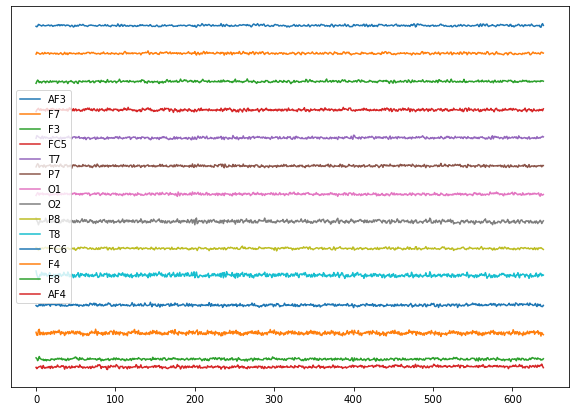

In [28]:
graphs.time_vis(data_car.copy())

### BandPass filter with freq response.

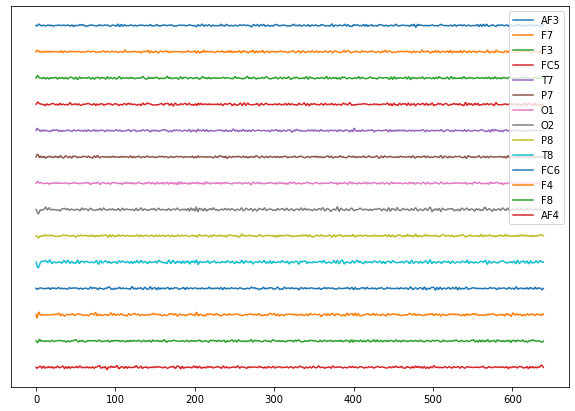

In [29]:
data_filter = helper.butter_band_filter(data_car.copy(),5, 40)
# trials_list_after_filter = prepare.Extraxt_trials(data_filter, number_sec)
graphs.time_vis(data_filter.copy())

### Power using welch.

In [30]:
freq, power, lable = helper.welch(data_filter,True, True)

### Power vs. Frequency visualization

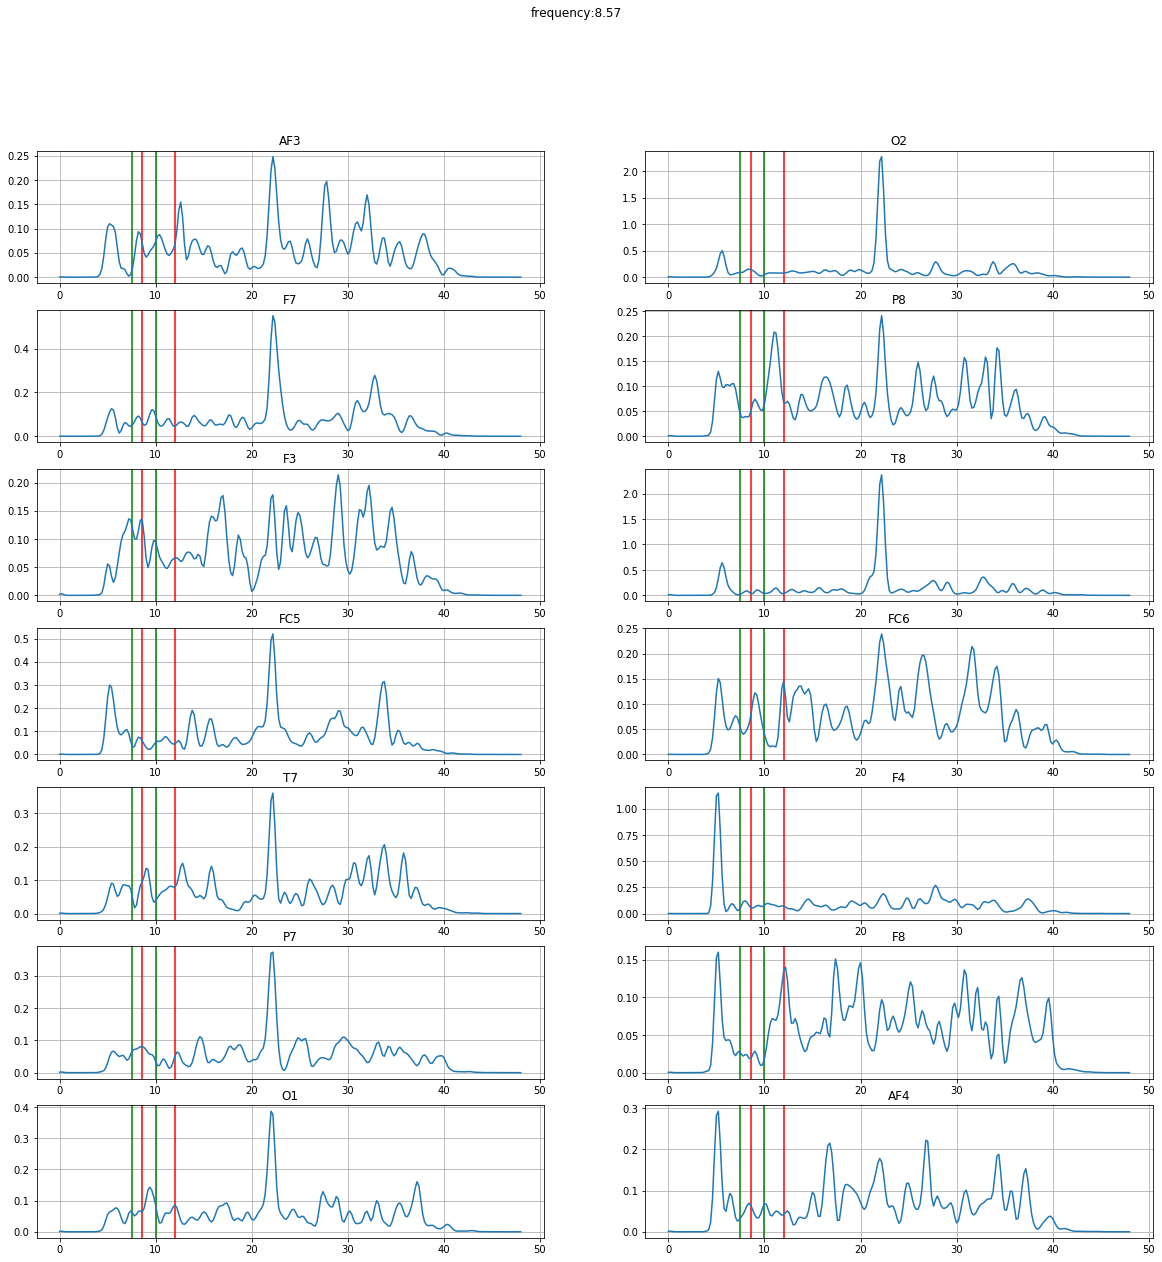

In [31]:
graphs.welch_vis(freq, power,lable,[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

### Extract Features 

### Prepare data for train

In [ ]:
prepare =  DataPrepare()
data = prepare.get_dataFromFiles(['D:/Graduation Project/EEG-SSVEP-DataSet/5_S/U0000ri.csv'], concate=True)

### Train

In [ ]:
process = Process()
process.train(data)

### Predict

### All needed modules can import or use it as you want.